In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
# this is a new library you haven't seen before, what do you think it does? 
from sklearn.neighbors import KNeighborsClassifier

<img src="http://www.nature.com/article-assets/npg/srep/2015/150825/srep13285/images/w926/srep13285-f4.jpg" width="300" height="300" />

From this article in [Scientific Reports](http://www.nature.com/articles/srep13285)

In [2]:
#read in the data 

#this is the data from the above plot 
elements=pd.read_csv('atomsradii.csv')
# these are the data you will use for testing. The elements
# are unknown but the correct classification is given to you 
testing=pd.read_csv('testing.csv')
print (elements)
print (testing)

     rWC   rCh Atom Type
0   0.78  0.50    B   PT
1   0.90  0.67   Si   PT
2   0.97  0.65   Ga   PT
3   1.04  0.76   Al   PT
4   1.10  0.79   Ir   PT
5   0.32  0.62   Zn   TM
6   0.45  0.68   Cd   TM
7   0.14  0.66   Be  Alk
8   0.25  0.87   Mg  Alk
9   0.19  0.99   Li  Alk
10  0.28  1.01   Na  Alk
11  0.54  1.23   Ca  Alk
12  0.59  1.34    K  Alk
13  0.69  1.36   Sr  Alk
14  0.74  1.45   Rb  Alk
    rWC   rCh Atom Type
0  0.51  1.12   X1  Alk
1  0.37  0.77   X2   TM
2  0.62  0.35   X3   PT
3  0.62  0.62   X4   TM
4  0.62  0.93   X5  Alk


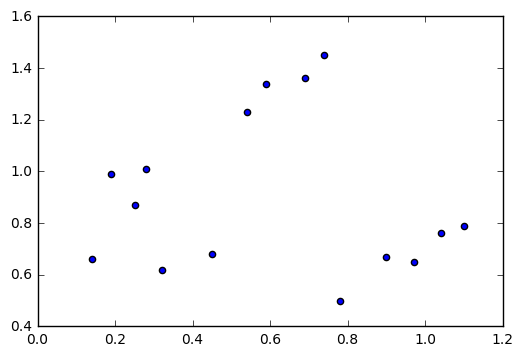

In [3]:
# Take 1-2 min and look @ the data in elements using pandas and Python
# you and your partner decide what to do.  
# you could recreate the above plot with plt.scatter(elements.rWC,elements.rCh)
plt.scatter(elements.rWC,elements.rCh)

In [7]:
#This variable controls K 
K=2
# make a new classifier object call "knn" by calling the appropriate function from 
# scikitlearn.  Look at the inputs to the function call 
knn = KNeighborsClassifier(n_neighbors=K)

# this next line fits the knn model and determines the decision boundary 
# the arguments are simply:  knn.fit(X,Y) (using language from class/ISL)
# note how I am passing the X data (a matrix of the x/y data plotted above)
# and note that I am using np.ravel on the Type dataframe. If you remove 
# np.ravel and just pass elements. Type you will see a warning.  You might
# take a moment to determine what is the difference between np.ravel(elements.Type)
# and elements.Type...

knn.fit(elements[['rWC','rCh']],np.ravel(elements.Type))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

### You can use the following function to see how your model is doing: 

`knn.predict(X) `

#### As a function of K, you and your partner should determine:  
* Testing error rate
* Training error rate 

#### Need not be quantitative but spend (1/2  - 2/3 of remaining time exploring this) 

### With remaining time go through the cell below and look at graphs of the decision boundary vs K. 
* See if you can use the graph to determine your **testing** error rate  
* Could you also use the graph to determine your **training** error rate? (_open ended_)

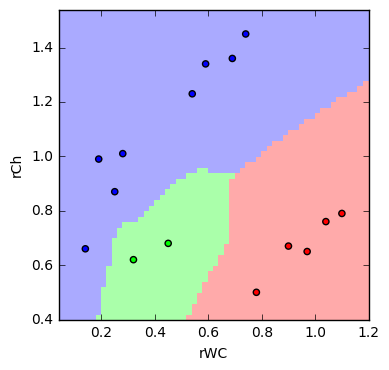

In [8]:
# additional library we will use 
from matplotlib.colors import ListedColormap

# just for convenience and similarity with sklearn tutorial
# I am going to assign our X and Y data to specific vectors
# this is not strictly needed and you could use elements df for the whole thing!

X=elements[['rWC','rCh']]

#this is a trick to turn our strings (type of element / class) into unique 
#numbers.  Play with this in a separate cell and make sure you know wth is 
#going on!
levels,labels=pd.factorize(elements.Type)
y=levels

#This determines levelspacing for our color map and the colors themselves
h=0.02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# in the sklearn tutorial two different weights are compared
# the decision between "uniform" and "distance" determines the probability
# weight.  "uniform" is the version presented in class, you can change to 
# distance
weights='uniform'

# I am actually refitting the KNN here. If you had a big data set you would
# not do this, but I want you to have the convenience of changing K or 
# weights here in this cell. Large training sets with many features can take 
# awhile for KNN training! 

K=1
clf = KNeighborsClassifier(n_neighbors=1, weights=weights)
clf.fit(X,y)

# Straight from the tutorial - quickly read and see if you know what these 
# things are going - if you are < 5 min until end then you should skip this part 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = elements.rWC.min() - 0.1  , elements.rWC.max() + 0.1
y_min, y_max = elements.rCh.min() - 0.1  , elements.rCh.max() + 0.1  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h)) 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(4,4));
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# This may be the 1st time you have seen how to color points by a 3rd vector
# In this case y ( see c=y in below statement ). This is very useful! 
plt.scatter(X.rWC, X.rCh, c=y, cmap=cmap_bold)

# Set limits and lebels 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('rWC')
plt.ylabel('rCh')

In [9]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')